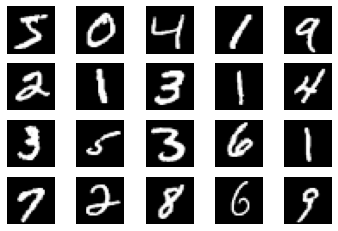

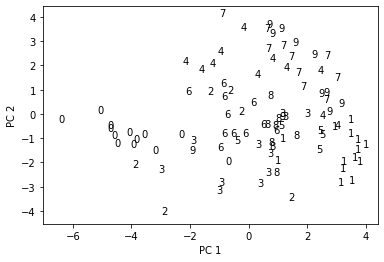

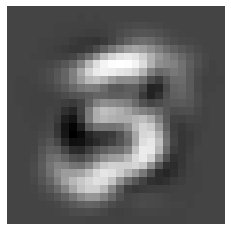

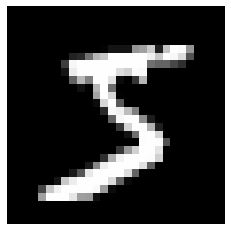

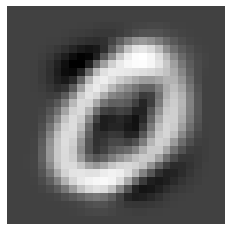

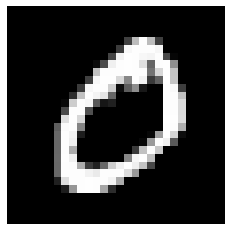

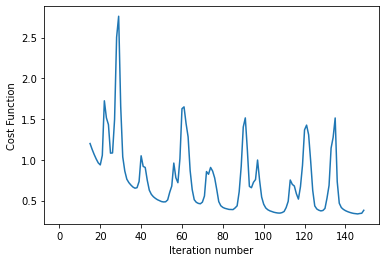

>>>>>>>>>>>>>>>>>>>>PCA 10 Error>>>>>>>>>>>>>>>>>>>>>>>
softmax test_error= 0.08489999999999998


In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import *
from linear_regression import *
from svm import *
from softmax import *
from features import *
from kernel import *

#######################################################################
# 1. Introduction
#######################################################################

# Load MNIST data:
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])

#######################################################################
# 2. Linear Regression with Closed Form Solution
#######################################################################

# TODO: first fill out functions in linear_regression.py, otherwise the functions below will not work


def run_linear_regression_on_MNIST(lambda_factor=1):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    theta = closed_form(train_x_bias, train_y, lambda_factor)
    test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    return test_error


# Don't run this until the relevant functions in linear_regression.py have been fully implemented.
# print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=1))


#######################################################################
# 3. Support Vector Machine
#######################################################################

# TODO: first fill out functions in svm.py, or the functions below will not work

def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


# print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())


def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


# print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())

#######################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
#######################################################################

# TODO: first fill out functions in softmax.py, or run_softmax_on_MNIST will not work


def run_softmax_on_MNIST(temp_parameter=1):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    # plot_cost_function_over_time(cost_function_history)
    # test_error = compute_test_error(test_x, test_y, theta, temp_parameter)
    # Save the model parameters theta obtained from calling softmax_regression to disk.
    # write_pickle_data(theta, "./theta.pkl.gz")

    # TODO: add your code here for the "Using the Current Model" question in tab 6.
    #      and print the test_error_mod3
    # train_x, train_y, test_x, test_y = get_MNIST_data()
    # theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    train_y,test_y=update_y(test_y=test_y,train_y=train_y)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error_mod3(test_x, test_y, theta, temp_parameter)
    write_pickle_data(theta, "./theta.pkl.gz")
    return test_error

# print("----------------------------------")
# print('softmax test_error=', run_softmax_on_MNIST(temp_parameter=1))

# TODO: Find the error rate for temp_parameter = [.5, 1.0, 2.0]
#      Remember to return the tempParameter to 1, and re-run run_softmax_on_MNIST

#######################################################################
# 6. Changing Labels
#######################################################################



def run_softmax_on_MNIST_mod3(temp_parameter=1):
    """
    Trains Softmax regression on digit (mod 3) classifications.

    See run_softmax_on_MNIST for more info.
    """
    # YOUR CODE HERE
    train_x, train_y, test_x, test_y = get_MNIST_data()
    # train_y,test_y=update_y(test_y=test_y,train_y=train_y)
    theta, cost_function_history = softmax_regression(train_x, train_y, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
    plot_cost_function_over_time(cost_function_history)
    test_error = compute_test_error_mod3(test_x, test_y, theta, temp_parameter)
    return test_error
    # raise NotImplementedError


# TODO: Run run_softmax_on_MNIST_mod3(), report the error rate
# print("-----------------------------------------------------------------")
# print('softmax mod_3 test_error=', run_softmax_on_MNIST_mod3(temp_parameter=1))

#######################################################################
# 7. Classification Using Manually Crafted Features
#######################################################################

## Dimensionality reduction via PCA ##

# TODO: First fill out the PCA functions in features.py as the below code depends on them.


n_components = 18

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

# train_pca (and test_pca) is a representation of our training (and test) data
# after projecting each example onto the first 18 principal components.


# TODO: Train your softmax regression model using (train_pca, train_y)
#       and evaluate its accuracy on (test_pca, test_y).
# theta, cost_function_history = softmax_regression(train_pca, train_y, temp_parameter=1, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
# plot_cost_function_over_time(cost_function_history)
# test_error = compute_test_error(test_pca, test_y, theta, temp_parameter=1)
# #Save the model parameters theta obtained from calling softmax_regression to disk.
# write_pickle_data(theta, "./theta.pkl.gz")
# print(">>>>>>>>>>>>>>>>>>>>PCA Error>>>>>>>>>>>>>>>>>>>>>>>")
# print('softmax test_error=', test_error)

# TODO: Use the plot_PC function in features.py to produce scatterplot
#       of the first 100 MNIST images, as represented in the space spanned by the
#       first 2 principal components found above.
plot_PC(train_x[range(000, 100), ], pcs, train_y[range(000, 100)], feature_means)#feature_means added since release


# TODO: Use the reconstruct_PC function in features.py to show
#       the first and second MNIST images as reconstructed solely from
#       their 18-dimensional principal component representation.
#       Compare the reconstructed images with the originals.
# firstimage_reconstructed = reconstruct_PC(train_pca[0, ], pcs, n_components, train_x, feature_means)#feature_means added since release
# plot_images(firstimage_reconstructed)
# plot_images(train_x[0, ])

# secondimage_reconstructed = reconstruct_PC(train_pca[1, ], pcs, n_components, train_x, feature_means)#feature_means added since release
# plot_images(secondimage_reconstructed)
# plot_images(train_x[1, ])


## Cubic Kernel ##
# TODO: Find the 10-dimensional PCA representation of the training and test set


# TODO: First fill out cubicFeatures() function in features.py as the below code requires it.
n_components = 10

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca10 = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca10 = project_onto_PC(test_x, pcs, n_components, feature_means)
train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.


# TODO: Train your softmax regression model using (train_cube, train_y)
#       and evaluate its accuracy on (test_cube, test_y).
theta, cost_function_history = softmax_regression(train_cube, train_y, temp_parameter=1, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
plot_cost_function_over_time(cost_function_history)
test_error = compute_test_error(test_cube, test_y, theta, temp_parameter=1)
#Save the model parameters theta obtained from calling softmax_regression to disk.
write_pickle_data(theta, "./theta.pkl.gz")
print(">>>>>>>>>>>>>>>>>>>>PCA 10 Error>>>>>>>>>>>>>>>>>>>>>>>")
print('softmax test_error=', test_error)


In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import *
from linear_regression import *
from svm import *
from softmax import *
from features import *
from kernel import *
from sklearn.svm import SVR,SVC
from sklearn.metrics import accuracy_score

In [3]:
train_x, train_y, test_x, test_y = get_MNIST_data()
# TODO: First fill out cubicFeatures() function in features.py as the below code requires it.
n_components = 10

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca10 = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca10 = project_onto_PC(test_x, pcs, n_components, feature_means)
train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.


# TODO: Train your softmax regression model using (train_cube, train_y)
#       and evaluate its accuracy on (test_cube, test_y).
pol_model=SVC( kernel = 'poly', degree = 3)
pol_model.fit(train_cube, train_y)
test_error = 1 - np.mean(pol_model.predict(test_cube) == test_y)
#Save the model parameters theta obtained from calling softmax_regression to disk.
# write_pickle_data(theta, "./theta.pkl.gz")
print(">>>>>>>>>>>>>>>>>>>>PCA 10 Error>>>>>>>>>>>>>>>>>>>>>>>")
print('Error=', test_error)

In [2]:
train_x, train_y, test_x, test_y = get_MNIST_data()
# TODO: First fill out cubicFeatures() function in features.py as the below code requires it.
n_components = 10

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca10 = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca10 = project_onto_PC(test_x, pcs, n_components, feature_means)
train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.


# TODO: Train your softmax regression model using (train_cube, train_y)
#       and evaluate its accuracy on (test_cube, test_y).
pol_model=SVC( kernel = 'poly', degree = 3)
pol_model.fit(train_cube, train_y)
# plot_cost_function_over_time(cost_function_history)
test_error = 1 - np.mean(pol_model.predict(test_cube) == test_y)
#Save the model parameters theta obtained from calling softmax_regression to disk.
# write_pickle_data(theta, "./theta.pkl.gz")
print(">>>>>>>>>>>>>>>>>>>>PCA 10 Error>>>>>>>>>>>>>>>>>>>>>>>")
print('Error=', test_error)

>>>>>>>>>>>>>>>>>>>>PCA 10 Error>>>>>>>>>>>>>>>>>>>>>>>
Error= 0.06710000000000005
